Credits: Csv file provided by Dataquest. Code written as part of Dataquest guided project.

# Import and Clean Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
star_wars = pd.read_csv('star_wars.csv', encoding = 'ISO-8859-1')

print (star_wars.head(5))

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           Response                      
1                                                Yes                      
2                                                NaN                      
3                                                 No                      
4                                                Yes                      

  Which of the following Star Wars films have you seen? Please selec

In [2]:
#Remove null values of Respondent ID
star_wars = star_wars [pd.notnull(star_wars['RespondentID'])]

In [3]:
#Convert Yes/No questions to True/False

yes_no = {'Yes': True, 'No' : False, np.nan: False}

questions = ['Have you seen any of the 6 films in the Star Wars franchise?',
            'Do you consider yourself to be a fan of the Star Wars film franchise?']

for q in questions:
    star_col = star_wars[q]
    star_wars[q] = star_col.map(yes_no)

In [4]:
#Convert checkbox questions to true/false

cols = ['Which of the following Star Wars films have you seen? Please select all that apply.',
      'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']

movie_names = []
i = 1
for col in cols:
    #Extract movie name from first value in column (true in this example)
    movie = star_wars[col][1]
    movie_names.append(movie)

In [5]:
i = 1
for col in cols:
    #Rename column names
    movie_map = {movie_names[i-1]: True, np.nan : False, False : False}
    star_wars[col] = star_wars[col].map(movie_map)
    new_col_name = 'seen_'+str(i)
    star_wars = star_wars.rename(columns= {col: new_col_name})
    i=i+1

In [6]:
#Convert columns 9-14 to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)


for i in range(9,15,1):
    old_name = star_wars.columns.values[i]
    new_name = 'ranking_'+str(i-8)
    star_wars = star_wars.rename(columns = {old_name:new_name})

# Highest Ranking Star Wars Movie

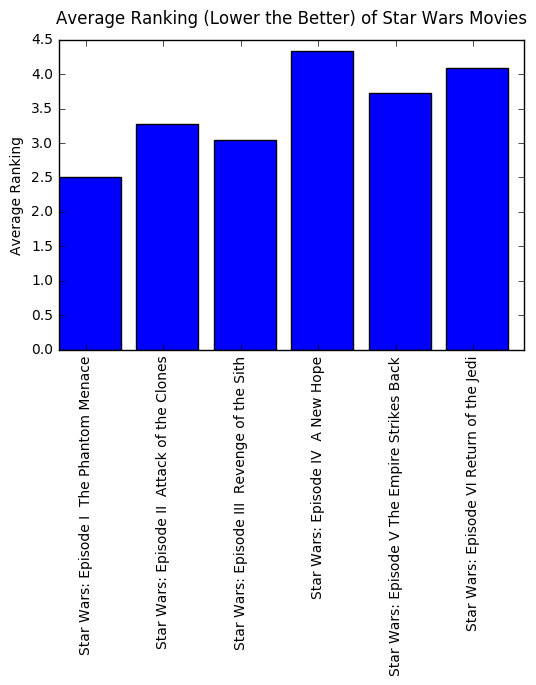

In [7]:
#Find highest ranking movie

def compile_rank (data):
    means = {}
    for i in range(1,7,1):
        col = 'ranking_'+str(i)
        mean = star_wars[col].mean()
        means[col] = mean
    return means

means = compile_rank(star_wars)
fig = plt.figure()
sub = fig.add_subplot(111)
sub.bar(left = np.arange (1,7,1), height = means.values())
sub.set_xticks(np.arange (1.35,7.35,1))
sub.set_xticklabels(movie_names, rotation = 90)
sub.set_ylabel('Average Ranking')
sub.set_title('Average Ranking (Lower the Better) of Star Wars Movies', y = 1.03)

plt.show()

Initial Analysis: Episode V is the best ranking Star Wars movie. Following after are episodes III an I. The lowest ranking movie is episode VI. 

Future work: Group responses according to different factors. Eg: Favorite movie among different age groups, genders, etc. Weight responses according to whether the respondent watched the movies.

# Most Seen Star Wars Movie

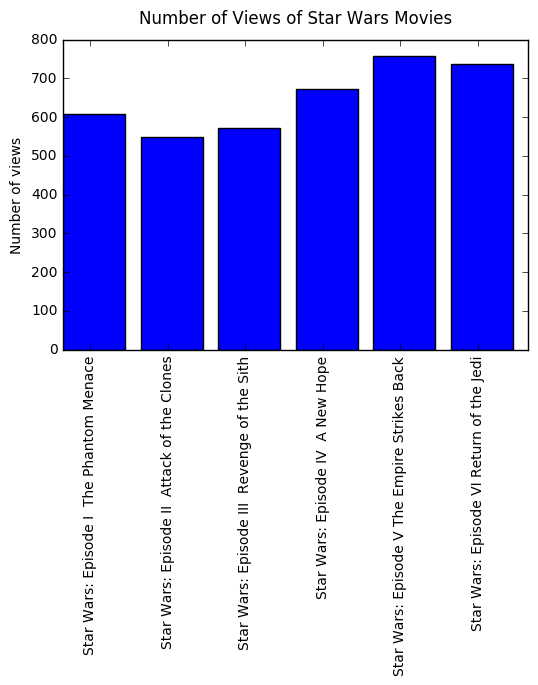

In [8]:
#Finding the most seen movie
def compile_views(data):
    sums = {}
    for i in range(1,7,1):
        col = 'seen_'+str(i)
        num_seen = data[col].sum()
        sums[col] = num_seen
    return sums

sums = compile_views(star_wars)
fig = plt.figure()
sub = fig.add_subplot(111)
sub.bar(left = range (1,7,1), height = sums.values() )
sub.set_xticks(np.arange (1.35,7.35,1))
sub.set_xticklabels(movie_names, rotation = 90)
sub.set_ylabel('Number of views')
sub.set_title('Number of Views of Star Wars Movies', y = 1.03)
plt.show()

Initial Analysis: The most seen movie is episode one, while the least seen is episode 5. How does this effect the previous ranking plot? Need to investigate in the future.

# Gender Breakdown of Star Wars Movies Views

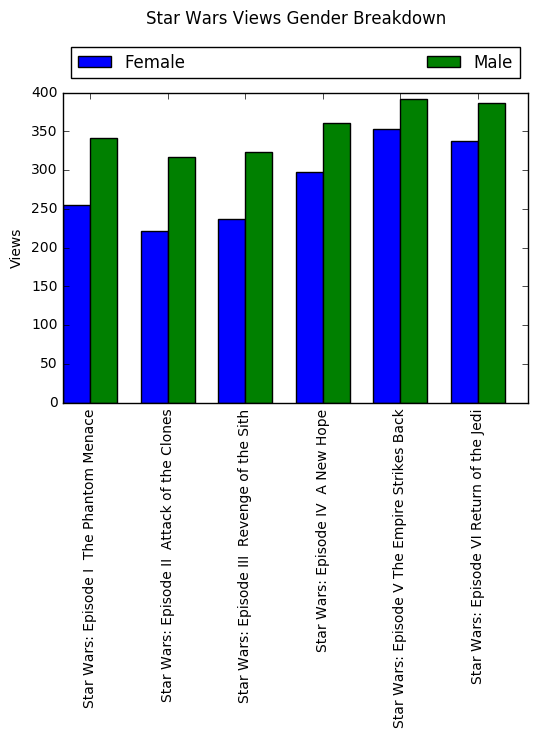

In [9]:
#Breakdown views according to gender

males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

genders = [males, females]

fig = plt.figure()

sub = fig.add_subplot(1,1,1)
sums = compile_views(females)
sub.bar(left = np.arange (1,7,1), height = sums.values(), width = 0.35)
sums = compile_views(males)
sub.bar(left = np.arange (1.35,7.35,1), height = sums.values(), width =0.35, color = 'green')
sub.set_xticks(np.arange (1.35,7.35,1))
sub.set_xticklabels(movie_names, rotation = 90)
sub.set_ylabel('Views')
sub.set_title('Star Wars Views Gender Breakdown', y = 1.2)
sub.legend(['Female', 'Male'], loc = 'lower left', bbox_to_anchor = (0., 1.02, 1., 1.02),mode = 'expand', ncol = 2 )

plt.show()

Initial Analysis: More males viewed each movie than females in this survey. Question data source: was sampling truly random? 

Future Work: Incoporate and correlate to critic reviews, earnings. As mentioned before, analyze movie preference and views of different groups. Is there an age barrier to episodes 4-6? 